<a href="https://colab.research.google.com/github/LekhanaCh/Walmart/blob/main/Walmart_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Walmart - Confidence Interval and CLT**

# **Defining Problem Statement and Analyzing basic metrics**


The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.



# Importing the libraries we require and loading the dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
df = pd.read_csv('walmart_data.csv')

# **Observations on the shape of data, data types of all the attributes missing value detection, statistical summary**

In [ ]:
df.shape

(550068, 10)

There are a total of 550068 records and 10 columns in the given dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are no null values in the dataset.

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase]
Index: []


No duplicate values are present.

## **Identifying numerical and categorical columns:**

We can identify that the columns:

'User_ID','Product_ID','Gender', 'Age', 'City_Category','Stay_In_Current_City_Years','Marital_Status' are categorical

'Occupation','Product_Category','Purchase' are numerical columns.

In [ ]:
cat_columns = ['User_ID','Product_ID','Gender', 'Age', 'City_Category',
                       'Stay_In_Current_City_Years','Marital_Status']
for col in cat_columns:
    df[col] =  df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(3)
memory usage: 17.6 MB


## Statistical summary

In [ ]:
df.describe()

,Occupation,Product_Category,Purchase
count,550068.000000,550068.000000,550068.000000
mean,8.076707,5.404270,9263.968713
std,6.522660,3.936211,5023.065394
min,0.000000,1.000000,12.000000
25%,2.000000,1.000000,5823.000000
50%,7.000000,5.000000,8047.000000
75%,14.000000,8.000000,12054.000000
max,20.000000,20.000000,23961.000000


**Insight**: As we can observe the mean and standard deviation has significant difference for Purchase, so Purchase column might be containg outliers.

In [ ]:
# df.describe(include = object) #to check statistical summary of categorical type data

df.describe(include='category').T #to check statistical summary of categorical type data


,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


**Insights:**

From the above data we can observe that:

* Customer with User ID 1001680 has made the most purchases.
* Most customers are Men.
* Most customers are in the age group of 26-35.
* Maximum customers are unmarried.
* Maximum customers who purchased the items are residents for one year.
* Product ID P00265242 is the most bought product.
* Customers from City_Category 'B' have purchased more items.

In [ ]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


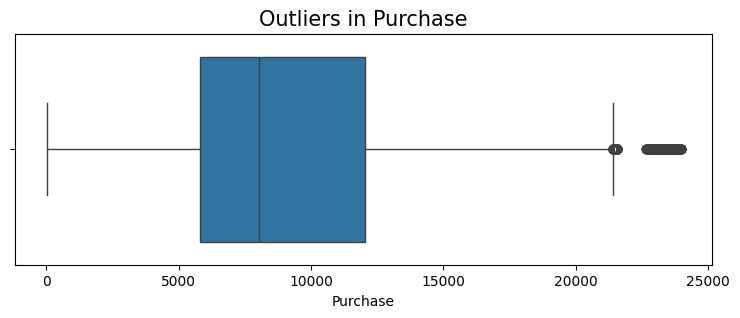

In [ ]:
plt.figure(figsize=(9,3))
sns.boxplot(x= df['Purchase'])
plt.title("Outliers in Purchase", fontsize= 15)
plt.show()


* Data suggests that the majority of customers spent between 5,800 USD and 12,000 USD, with the median purchase amount being around 8,000 USD.
* Outliers are detected in the Purchase column after 21,000 USD till 25,000 USD.

In [ ]:
df['Product_Category'].value_counts().head()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864


Product categories '1' and '5' exhibit higher purchase amounts, indicating that these categories contribute significantly to the overall sales revenue.

In [ ]:
df['User_ID'].value_counts().head()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823


User ID with 1001680 has the highest purchases.

In [ ]:
df['Product_ID'].value_counts().head()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470


Product ID P00265242 is the highest sold product.

In [ ]:
df['Occupation'].value_counts().head()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043


Customers with Occupation 4 have made the highest purchases.

In [ ]:
df['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


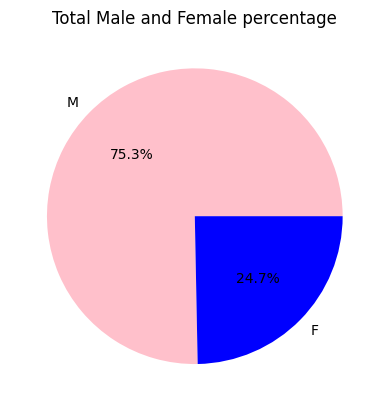

In [ ]:
plt.pie(df['Gender'].value_counts().values , labels=df['Gender'].value_counts().index, autopct='%1.1f%%' , colors = ['pink' , 'blue'])
plt.title('Total Male and Female percentage')
plt.show()

Men have made 75.3% of the total purchases, while Women has a contribution of 24.7%.

In [ ]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


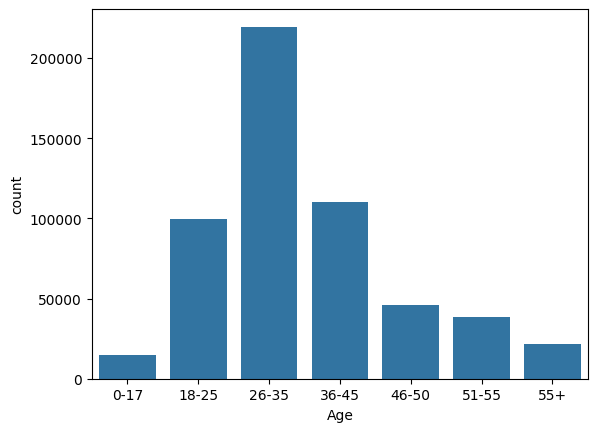

In [ ]:
sns.countplot(data=df, x="Age")
plt.show()

Most of the purchases are made by the Customers of the age group 26-35. 219587 being the number of purchases made by this group.

In [ ]:
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [ ]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


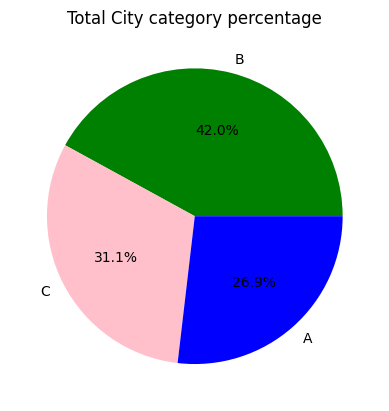

In [ ]:
plt.pie(df['City_Category'].value_counts().values , labels=df['City_Category'].value_counts().index, autopct='%1.1f%%' , colors = ['green','pink' , 'blue'])
plt.title('Total City category percentage')
plt.show()



*   Customers in the City_Category B have made the highest purchases of 42%.
*   Customers in the City_Category C have made purchases of 31.1%.
*   Customers in the City_Category A have made purchases of 26.9%.




In [ ]:
df['Stay_In_Current_City_Years'].unique()

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


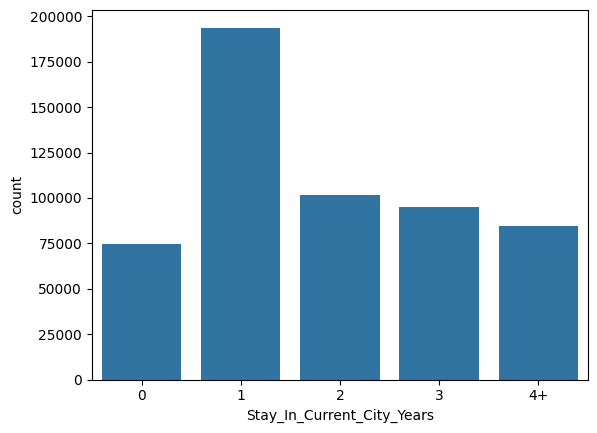

In [ ]:
sns.countplot(data=df, x='Stay_In_Current_City_Years')
plt.show()

Majority of the Customers are residing in the current city since a year.

In [ ]:
df['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


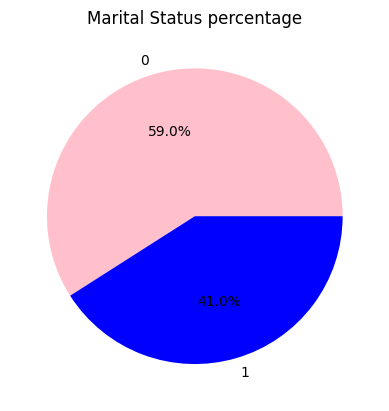

In [ ]:
plt.pie(df['Marital_Status'].value_counts().values , labels=df['Marital_Status'].value_counts().index, autopct='%1.1f%%' , colors = ['pink' , 'blue'])
plt.title('Marital Status percentage')
plt.show()

Most of the Customers are unmarried.


*   Unmarried Customer purchases are 324731 and 59% of the total sales.
*   Married Customer purchases are 225337 and 41% of the total sales.


## **Purchases and Marital Status.**

In [ ]:
#creating a df for purchase amount vs marital status
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

<ipython-input-147-f8d6c72b349a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()


,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,0,3008927447,324731,3.01,0.59,9266.0
1,1,2086885295,225337,2.09,0.41,9261.0


* Total Sales and Transactions Comparison

The total purchase amount by Unmarried customers was 18% more than the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.
* Average Transaction Value

The average purchase amount per transaction was almost similar for married and unmarried customers.

In [ ]:
#highest amount by users
df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

<ipython-input-148-35ae13a94f3f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)


,Purchase
User_ID,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609
1004448,6566245
1005831,6512433
1001015,6511314
1003391,6477160


User with ID 1004277 has made the highest sales.

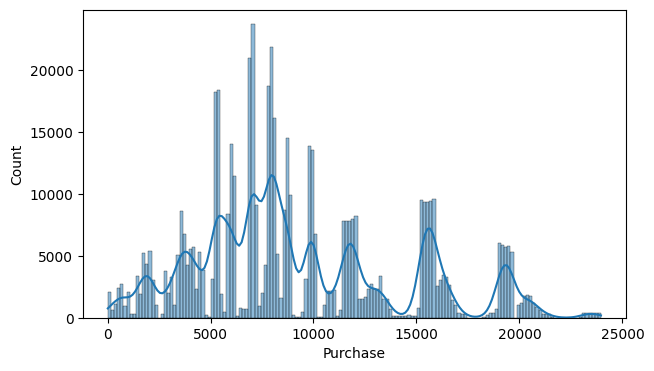

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

## **Bivariate Analysis**

In [ ]:
pivot = lambda index: df.pivot_table(index=df[index], columns='Gender', aggfunc='size', fill_value=0)

In [ ]:
pivot('Age')

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


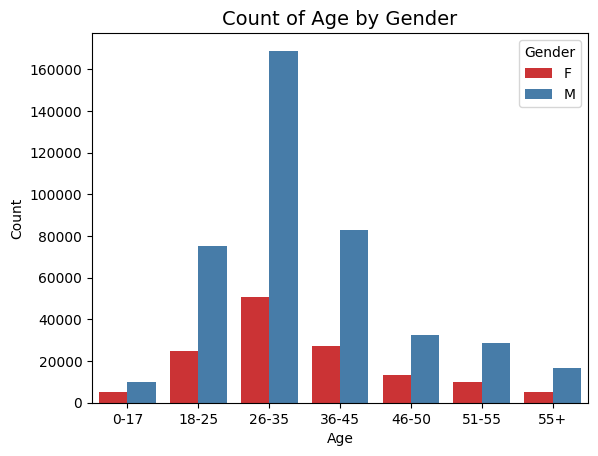

In [ ]:
sns.countplot(data=df, x='Age', hue='Gender', palette='Set1')
plt.title('Count of Age by Gender', fontsize=14, fontfamily='sans-serif')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* Men and women of the age group 26-35 have made the highest sales.
* Second highest sales are made by the age group 36-45.


In [ ]:
pivot('Stay_In_Current_City_Years')

Gender,F,M
Stay_In_Current_City_Years,,
0,17063,57335
1,51298,142523
2,24332,77506
3,24520,70765
4+,18596,66130


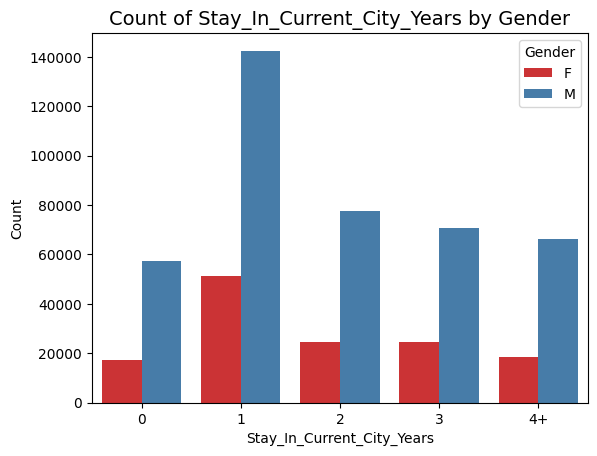

In [ ]:
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Gender', palette='Set1')
plt.title('Count of Stay_In_Current_City_Years by Gender', fontsize=14, fontfamily='sans-serif')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.show()

Majority of the customers are staying in the current city for a year.

In [ ]:
pivot('City_Category')

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


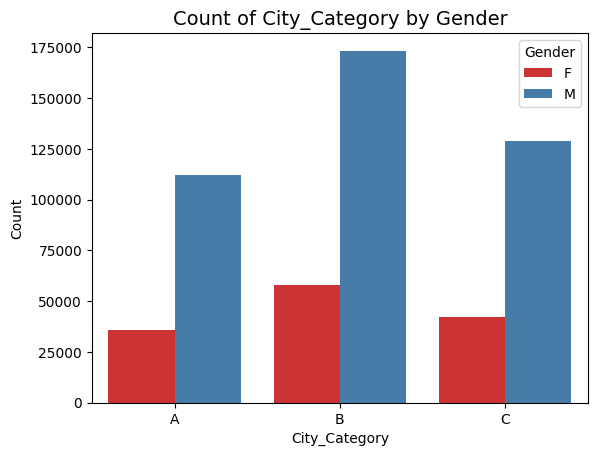

In [ ]:
sns.countplot(data=df, x='City_Category', hue='Gender', palette='Set1')
plt.title('Count of City_Category by Gender', fontsize=14, fontfamily='sans-serif')
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.show()

Male customers in the City category B have made the most purchases.

In [ ]:
pivot('Marital_Status')

Gender,F,M
Marital_Status,,
0,78821,245910
1,56988,168349


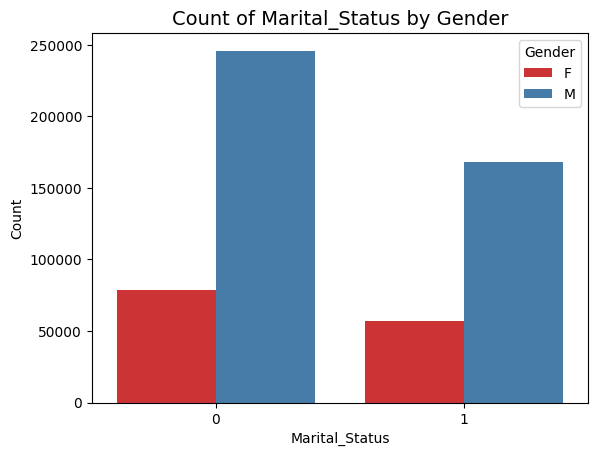

In [ ]:
sns.countplot(data=df, x='Marital_Status', hue='Gender', palette='Set1')
plt.title('Count of Marital_Status by Gender', fontsize=14, fontfamily='sans-serif')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.show()

Unmarried Men have made the highest sales with a number of 245910.

In [ ]:
df.groupby('Gender')[['Purchase']].mean().reset_index().round(2)

<ipython-input-199-64630eeb7e41>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')[['Purchase']].mean().reset_index().round(2)


,Gender,Purchase
0,F,8734.57
1,M,9437.53


**Insight:**
The average amount spent by male customers (9437) is higher than the average amount spent by female customers (8734).

## **Multivariate Analysis**

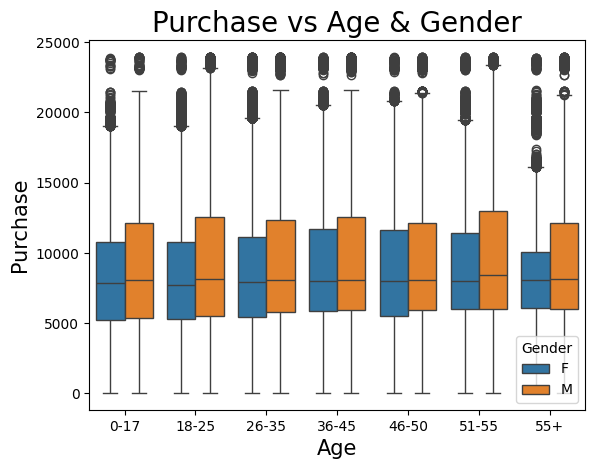

In [ ]:
# Purchase, Age and Gender

sns.boxplot(x= df['Age'],y = df['Purchase'], hue = df['Gender'])
plt.xlabel("Age", fontsize=15)
plt.ylabel("Purchase", fontsize=15)
plt.title("Purchase vs Age & Gender", fontsize= 20)
plt.show()

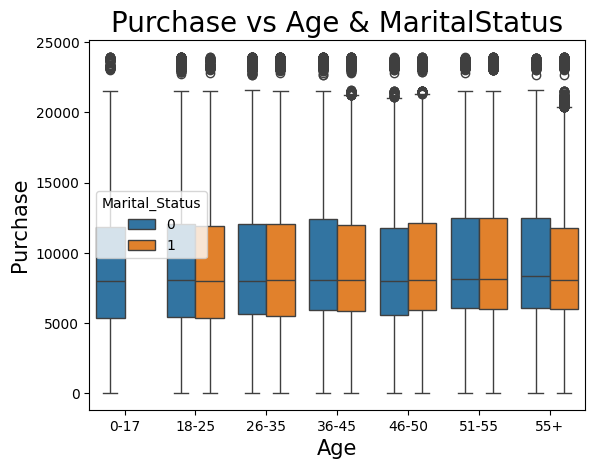

In [ ]:
# Purchase, Age and Marital Status

sns.boxplot(x= df['Age'],y = df['Purchase'], hue = df['Marital_Status'])
plt.xlabel("Age", fontsize=15)
plt.ylabel("Purchase", fontsize=15)
plt.title("Purchase vs Age & MaritalStatus", fontsize= 20)
plt.show()

## Are women spending more money per transaction than men? Why or Why not?

In [ ]:
df.groupby('Gender')['Purchase'].sum()

<ipython-input-162-01119d7b6124>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase'].sum()


,Purchase
Gender,
F,1186232642
M,3909580100


In [ ]:
df['Gender'].value_counts(normalize=True)*100


,proportion
Gender,
M,75.310507
F,24.689493


Text(0.5, 1.0, 'Spending money per transaction')

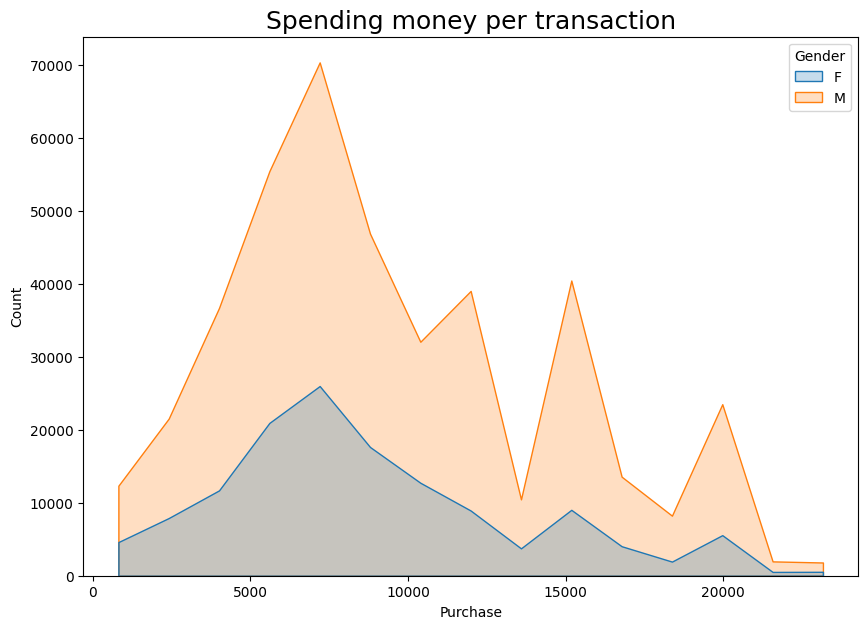

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x = "Purchase", bins=15, hue = "Gender", element="poly")
plt.title('Spending money per transaction', fontsize=18)

**Insights**:
* From the abouve plot it is observerd that money spent by women customers is quite less than men per transaction.
* Men tend to outspend women. Approximately 75% of the total contributions come from men, with women accounting for only 25% of the purchases.


The lower purchase behavior by women compared to men can be influenced by various factors

* Women, on average, may have lower incomes than men
* Due to different preferences for products, brands, or preferred shopping experiences can affect their spending.
* Unequal access to credit and financial services can limit women's ability to make purchases, especially for larger or more expensive items.

# **Confidence intervals for the Average amount spent per gender for the entire dataset.**

In [ ]:
# Calculates the 90%,95%,99% confidence interval and width for a specified category within a given variable in the dataset.

def data_ci(data, variable, category, confidence_level):

    category_data = data[data[variable] == category]['Purchase']
    category_mean = category_data.mean()
    category_std = category_data.std()

    # standard error of the mean
    category_sem = category_std / np.sqrt(len(category_data))

    # margin of error
    category_moe = category_sem * norm.ppf((1 + confidence_level) / 2)

    # confidence interval
    category_ci = (category_mean - category_moe, category_mean + category_moe)

    # width
    category_width = category_ci[1] - category_ci[0]

    print(f'{category} {confidence_level*100}% confidence interval: {category_ci}')
    print(f'{category} Width: {category_width}')


In [ ]:
data_ci(df, 'Gender', 'M',0.90)

M 90.0% confidence interval: (9424.512497305488, 9450.539583639042)
M Width: 26.027086333553598


In [ ]:
data_ci(df, 'Gender', 'F',0.90)

F 90.0% confidence interval: (8713.287834648021, 8755.84369566293)
F Width: 42.55586101490917


In [ ]:
data_ci(df, 'Gender', 'M',0.95)

M 95.0% confidence interval: (9422.01944736257, 9453.032633581959)
M Width: 31.013186219388444


In [ ]:
data_ci(df, 'Gender', 'F',0.95)

F 95.0% confidence interval: (8709.21154714068, 8759.919983170272)
F Width: 50.70843602959212


In [ ]:
data_ci(df, 'Gender', 'M',0.99)

M 99.0% confidence interval: (9417.146922669479, 9457.90515827505)
M Width: 40.75823560557183


In [ ]:
data_ci(df, 'Gender', 'F',0.99)

F 99.0% confidence interval: (8701.244674438389, 8767.886855872563)
F Width: 66.64218143417384


## **Confidence Interval Summary:**

Male:-

90% -> 9424.51 - 9450.54

95% -> 9422.02 - 9453.03

99% -> 9417.15 - 9457.90

Female:-

90% -> 8713.29 - 8755.84

95% -> 8709.21 - 8759.92

99% -> 8701.24 - 8767.89


## **Insights:**
* The confidence interval computed using the entire dataset is wider for males compared to females, indicating higher variability in the amount spent by males.

# **Confidence intervals of 300, 3000 and 30000 samples.**



In [ ]:
# Calculates the 90%,95%,99% confidence interval and width for a specified category within a given variable in a sampled dataset.

def sample_ci(data, variable, category, sample_size,confidence_interval):

    category_data = data[data[variable] == category]['Purchase']
    sample_data = category_data.sample(n=sample_size, random_state=42)
    mean_val = sample_data.mean()
    std_dev = sample_data.std()

    # standard error of the mean
    sem = std_dev / np.sqrt(sample_size)

    # margin of error
    moe = sem * norm.ppf((1 + confidence_interval) / 2)

    # confidence interval
    ci = (mean_val - moe, mean_val + moe)

    category_width = ci[1] - ci[0]

    print(f"\nSample Size: {sample_size}")
    print(f'{category} {confidence_interval*100}% confidence interval: {ci}')
    print(f'{category} Width: {category_width}')

In [ ]:
sample_ci(df, 'Gender', 'M', 300, 0.90)


Sample Size: 300
M 90.0% confidence interval: (9380.83746339652, 10394.609203270147)
M Width: 1013.7717398736277


In [ ]:
sample_ci(df, 'Gender', 'F', 300, 0.90)


Sample Size: 300
F 90.0% confidence interval: (8398.670945742073, 9336.229054257929)
F Width: 937.5581085158556


In [ ]:
sample_ci(df, 'Gender', 'M', 3000,0.90)


Sample Size: 3000
M 90.0% confidence interval: (9489.930814851989, 9801.341185148012)
M Width: 311.41037029602376


In [ ]:
sample_ci(df, 'Gender', 'F', 3000,0.90)


Sample Size: 3000
F 90.0% confidence interval: (8658.782721289897, 8954.244612043434)
F Width: 295.46189075353686


In [ ]:
sample_ci(df, 'Gender', 'M', 30000,0.90)


Sample Size: 30000
M 90.0% confidence interval: (9438.269538879862, 9535.561994453472)
M Width: 97.29245557360991


In [ ]:
sample_ci(df, 'Gender', 'F', 30000,0.90)


Sample Size: 30000
F 90.0% confidence interval: (8610.964490517577, 8700.998442815755)
F Width: 90.03395229817761


### **90% Confidence Interval Summary for a sample of 300, 3000, 30000:**
Male:-

Sample of 300   -> 9380.84 - 10394.61

Sample of 3000  -> 9489.93 - 9801.34

Sample of 30000 -> 9438.27 - 9535.56


Female:-

Sample of 300   -> 8398.67 - 9336.23

Sample of 3000  -> 8658.78 - 8954.24

Sample of 30000 -> 8610.96 - 8700.99

In [ ]:
sample_ci(df, 'Gender', 'M', 300, 0.95)


Sample Size: 300
M 95.0% confidence interval: (9283.731565877591, 10491.715100789075)
M Width: 1207.9835349114837


In [ ]:
sample_ci(df, 'Gender', 'F', 300, 0.95)


Sample Size: 300
F 95.0% confidence interval: (8308.865304074718, 9426.034695925284)
F Width: 1117.1693918505662


In [ ]:
sample_ci(df, 'Gender', 'M', 3000,0.95)


Sample Size: 3000
M 95.0% confidence interval: (9460.10182838994, 9831.170171610062)
M Width: 371.0683432201222


In [ ]:
sample_ci(df, 'Gender', 'F', 3000,0.95)


Sample Size: 3000
F 95.0% confidence interval: (8630.48138780842, 8982.545945524911)
F Width: 352.0645577164905


In [ ]:
sample_ci(df, 'Gender', 'M', 30000,0.95)


Sample Size: 30000
M 95.0% confidence interval: (9428.950211018666, 9544.881322314668)
M Width: 115.9311112960022


In [ ]:
sample_ci(df, 'Gender', 'F', 30000,0.95)


Sample Size: 30000
F 95.0% confidence interval: (8602.340431075772, 8709.62250225756)
F Width: 107.28207118178761


### **95% Confidence Interval Summary for a sample of 300, 3000, 30000:**
Male:-

Sample of 300   -> 9283.73 - 10491.71

Sample of 3000  -> 9460.10 - 9831.17

Sample of 30000 -> 9428.95 - 9544.88


Female:-

Sample of 300   -> 8308.86 - 9426.03

Sample of 3000  -> 8630.48 - 8982.54

Sample of 30000 -> 8602.34 - 8709.62

In [ ]:
sample_ci(df, 'Gender', 'M', 300, 0.99)


Sample Size: 300
M 99.0% confidence interval: (9093.943597589929, 10681.503069076738)
M Width: 1587.5594714868093


In [ ]:
sample_ci(df, 'Gender', 'F', 300, 0.99)


Sample Size: 300
F 99.0% confidence interval: (8133.345271735851, 9601.55472826415)
F Width: 1468.2094565282978


In [ ]:
sample_ci(df, 'Gender', 'M', 3000,0.99)


Sample Size: 3000
M 99.0% confidence interval: (9401.80276642402, 9889.469233575981)
M Width: 487.6664671519611


In [ ]:
sample_ci(df, 'Gender', 'F', 3000,0.99)


Sample Size: 3000
F 99.0% confidence interval: (8575.168036935633, 9037.859296397699)
F Width: 462.6912594620662


In [ ]:
sample_ci(df, 'Gender', 'M', 30000,0.99)


Sample Size: 30000
M 99.0% confidence interval: (9410.736113360614, 9563.09541997272)
M Width: 152.3593066121066


In [ ]:
sample_ci(df, 'Gender', 'F', 30000,0.99)


Sample Size: 30000
F 99.0% confidence interval: (8585.485196103737, 8726.477737229596)
F Width: 140.99254112585913


### **99% Confidence Interval Summary for a sample of 300, 3000, 30000:**
Male:-

Sample of 300   -> 9093.94 - 10681.50

Sample of 3000  -> 9401.80 - 9889.47

Sample of 30000 -> 9410.74 - 9563.09


Female:-

Sample of 300   -> 8133.35 - 9601.55

Sample of 3000  -> 8575.17 - 9037.86

Sample of 30000 -> 8585.49 - 8726.48

## **Insights:**


* Larger sample sizes result in more normally shaped distributions of means due to the Central Limit Theorem.
* The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that the larger sample sizes can provide more reliable insights and estimates.


## **Results when the same activity is performed for Married vs Unmarried**

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


In [ ]:
sample_ci(df,'Marital_Status',1,3000,0.90)

sample_ci(df,'Marital_Status',0,3000,0.90)



Sample Size: 3000
1 90.0% confidence interval: (9147.855973807313, 9453.680692859354)
1 Width: 305.8247190520415

Sample Size: 3000
0 90.0% confidence interval: (9275.612756495602, 9582.937910171064)
0 Width: 307.3251536754615


In [ ]:
sample_ci(df,'Marital_Status',1,3000,0.95)

sample_ci(df,'Marital_Status',0,3000,0.95)



Sample Size: 3000
1 95.0% confidence interval: (9118.562018709765, 9482.974647956902)
1 Width: 364.4126292471374

Sample Size: 3000
0 95.0% confidence interval: (9246.175079645862, 9612.375587020804)
0 Width: 366.2005073749424


In [ ]:
sample_ci(df,'Marital_Status',1,3000,0.99)

sample_ci(df,'Marital_Status',0,3000,0.99)



Sample Size: 3000
1 99.0% confidence interval: (9061.308645195655, 9540.228021471012)
1 Width: 478.9193762753566

Sample Size: 3000
0 99.0% confidence interval: (9188.640810119834, 9669.909856546832)
0 Width: 481.2690464269981


In [ ]:
sample_ci(df,'Marital_Status',1,30000,0.90)

sample_ci(df,'Marital_Status',0,30000,0.90)



Sample Size: 30000
1 90.0% confidence interval: (9207.31010800703, 9302.875958659635)
1 Width: 95.56585065260515

Sample Size: 30000
0 90.0% confidence interval: (9238.960574619343, 9334.428558713991)
0 Width: 95.46798409464827


In [ ]:
sample_ci(df,'Marital_Status',1,30000,0.95)

sample_ci(df,'Marital_Status',0,30000,0.95)



Sample Size: 30000
1 95.0% confidence interval: (9198.156166015178, 9312.029900651487)
1 Width: 113.87373463630865

Sample Size: 30000
0 95.0% confidence interval: (9229.816006946752, 9343.573126386582)
0 Width: 113.7571194398297


In [ ]:
sample_ci(df,'Marital_Status',1,30000,0.99)

sample_ci(df,'Marital_Status',0,30000,0.99)



Sample Size: 30000
1 99.0% confidence interval: (9180.265305657105, 9329.92076100956)
1 Width: 149.65545535245474

Sample Size: 30000
0 99.0% confidence interval: (9211.94346816391, 9361.445665169424)
0 Width: 149.50219700551315


### **Confidence Interval Summary for a sample of 3000:**
Married:-

90% -> 9147.86 - 9453.68

95% -> 9118.56 - 9482.97

99% -> 9061.31 - 9540.23

Single:-

90% -> 9275.61 - 9582.94

95% -> 9246.16 - 9612.38

99% -> 9188.64 - 9669.91

**Insights**:
* The confidence interval for the 'Married' group is wider than that for the 'Single' group, indicating higher variability in the amount spent for married individuals.

* The width of the confidence interval decreases as the sample size increases, showcasing the impact of larger sample sizes on precision.

* Yes, the confidence intervals for 'Married' and 'Unmarried' groups overlap, suggesting that observed differences may not be statistically significant across sample sizes.


## **How can Walmart leverage this conclusion to make changes or improvements?**
Regarding marketing, Walmart may not need to allocate marketing resources specifically target Married group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

## **Results when the same activity is performed for Age**

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  sample_ci(df,'Age',val,300,0.90)



Sample Size: 300
26-35 90.0% confidence interval: (8463.364169946071, 9426.94916338726)
26-35 Width: 963.584993441189

Sample Size: 300
36-45 90.0% confidence interval: (9147.725796173214, 10079.107537160118)
36-45 Width: 931.3817409869043

Sample Size: 300
18-25 90.0% confidence interval: (8934.83693380553, 9905.789732861136)
18-25 Width: 970.9527990556053

Sample Size: 300
46-50 90.0% confidence interval: (8882.794231263066, 9835.859102070266)
46-50 Width: 953.0648708072004

Sample Size: 300
51-55 90.0% confidence interval: (8728.39637243007, 9713.14362756993)
51-55 Width: 984.7472551398605

Sample Size: 300
55+ 90.0% confidence interval: (8761.75768650848, 9754.52231349152)
55+ Width: 992.7646269830402

Sample Size: 300
0-17 90.0% confidence interval: (8134.827284254519, 9102.726049078814)
0-17 Width: 967.8987648242946


In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  sample_ci(df,'Age',val,300,0.95)


Sample Size: 300
26-35 95.0% confidence interval: (8371.065497628038, 9519.247835705293)
26-35 Width: 1148.1823380772548

Sample Size: 300
36-45 95.0% confidence interval: (9058.511768661901, 10168.32156467143)
36-45 Width: 1109.8097960095292

Sample Size: 300
18-25 95.0% confidence interval: (8841.832523352577, 9998.79414331409)
18-25 Width: 1156.961619961512

Sample Size: 300
46-50 95.0% confidence interval: (8791.503247273877, 9927.150086059455)
46-50 Width: 1135.6468387855784

Sample Size: 300
51-55 95.0% confidence interval: (8634.07063589733, 9807.469364102672)
51-55 Width: 1173.3987282053422

Sample Size: 300
55+ 95.0% confidence interval: (8666.663992004576, 9849.616007995422)
55+ Width: 1182.9520159908461

Sample Size: 300
0-17 95.0% confidence interval: (8042.115409806883, 9195.43792352645)
0-17 Width: 1153.3225137195668


In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  sample_ci(df,'Age',val,300,0.99)


Sample Size: 300
26-35 99.0% confidence interval: (8190.672978301667, 9699.640355031665)
26-35 Width: 1508.9673767299973

Sample Size: 300
36-45 99.0% confidence interval: (8884.148012631216, 10342.685320702116)
36-45 Width: 1458.5373080708996

Sample Size: 300
18-25 99.0% confidence interval: (8660.06067887509, 10180.565987791577)
18-25 Width: 1520.5053089164867

Sample Size: 300
46-50 99.0% confidence interval: (8613.080197624267, 10105.573135709064)
46-50 Width: 1492.492938084797

Sample Size: 300
51-55 99.0% confidence interval: (8449.71633455022, 9991.823665449781)
51-55 Width: 1542.107330899562

Sample Size: 300
55+ 99.0% confidence interval: (8480.808760365888, 10035.471239634111)
55+ Width: 1554.6624792682233

Sample Size: 300
0-17 99.0% confidence interval: (7860.915310357435, 9376.638022975898)
0-17 Width: 1515.7227126184625


In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  sample_ci(df,'Age',val,3000,0.90)


Sample Size: 3000
26-35 90.0% confidence interval: (9139.537565154207, 9441.360434845794)
26-35 Width: 301.8228696915867

Sample Size: 3000
36-45 90.0% confidence interval: (9282.83882979708, 9586.022503536255)
36-45 Width: 303.183673739175

Sample Size: 3000
18-25 90.0% confidence interval: (9030.512586854618, 9335.013413145383)
18-25 Width: 304.50082629076496

Sample Size: 3000
46-50 90.0% confidence interval: (9058.482405178447, 9356.816261488219)
46-50 Width: 298.33385630977136

Sample Size: 3000
51-55 90.0% confidence interval: (9286.04840808614, 9589.049591913861)
51-55 Width: 303.0011838277205

Sample Size: 3000
55+ 90.0% confidence interval: (9214.253973594181, 9520.083359739152)
55+ Width: 305.82938614497107

Sample Size: 3000
0-17 90.0% confidence interval: (8717.200309220172, 9025.549024113161)
0-17 Width: 308.34871489298894


In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  sample_ci(df,'Age',val,3000,0.95)


Sample Size: 3000
26-35 95.0% confidence interval: (9110.626934190286, 9470.271065809715)
26-35 Width: 359.64413161942866

Sample Size: 3000
36-45 95.0% confidence interval: (9253.797851839656, 9615.063481493678)
36-45 Width: 361.26562965402263

Sample Size: 3000
18-25 95.0% confidence interval: (9001.345443138514, 9364.180556861487)
18-25 Width: 362.8351137229729

Sample Size: 3000
46-50 95.0% confidence interval: (9029.905975457834, 9385.392691208832)
46-50 Width: 355.486715750998

Sample Size: 3000
51-55 95.0% confidence interval: (9257.024910243761, 9618.07308975624)
51-55 Width: 361.0481795124797

Sample Size: 3000
55+ 95.0% confidence interval: (9184.959571450981, 9549.377761882351)
55+ Width: 364.41819043137

Sample Size: 3000
0-17 95.0% confidence interval: (8687.664588770689, 9055.084744562644)
0-17 Width: 367.42015579195504


In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  sample_ci(df,'Age',val,3000,0.99)


Sample Size: 3000
26-35 99.0% confidence interval: (9054.12274595097, 9526.775254049031)
26-35 Width: 472.65250809806093

Sample Size: 3000
36-45 99.0% confidence interval: (9197.038907795584, 9671.82242553775)
36-45 Width: 474.7835177421657

Sample Size: 3000
18-25 99.0% confidence interval: (8944.339915275958, 9421.186084724044)
18-25 Width: 476.8461694480866

Sample Size: 3000
46-50 99.0% confidence interval: (8974.05496459072, 9441.243702075946)
46-50 Width: 467.18873748522674

Sample Size: 3000
51-55 99.0% confidence interval: (9200.300130092966, 9674.797869907035)
51-55 Width: 474.49773981406906

Sample Size: 3000
55+ 99.0% confidence interval: (9127.705324211507, 9606.632009121826)
55+ Width: 478.9266849103187

Sample Size: 3000
0-17 99.0% confidence interval: (8629.938698590571, 9112.810634742762)
0-17 Width: 482.87193615219076


**Insights:**

Confidence Intervals and customer spending patterns:

From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups -

* 0 - 17 : Customers in this age group have the lowest spending per transaction

* 18 - 25, 26 - 35, 46 - 50 : Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics

* 36 - 45, 51-55, 55+ : Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns

**Recommendations**:


* As the Sales are less among the female customers, advertise more products that could be purchased by them and include wide range of products.
* Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers.
* The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.
* Focus on the age group 26-45 as they are contributing to the majority of sales. Walmart should specifically cater to the preferences and needs of this demographic. This could include offering exclusive deals on products that are popular among this age group.
* Design promotions or incentives based on the top occupations, such as '0' and '4', to further boost sales from these occupational groups.
* Implementing a rewards program for purchases exceeding certain amount can serve as an effective strategy to incentivize customers to spend more. This may initiative can encourage higher-value transactions and foster customer loyalty.
* Focus on the City_Category 'B' where the highest purchases are observed. Tailor promotions to resonate with the preferences of customers in this category.